In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lightgbm import LGBMRegressor

In [2]:
cf = pd.read_csv('2023 Nov Corp Brand_CFG data.xlsx - Evaluate CF.csv') 

In [5]:
X = cf[['Knowledgeable', 'Fair', 'Ethical', 'Sustainable', 'Mission Driven', 'Courageous', 'Inclusive',
           'Responsive', 'Generous', 'Transparent',	'Accessible', 'Sincere']]

y = cf.DV

In [6]:
model = LGBMRegressor()
model.fit(X,y)

LGBMRegressor()

In [7]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

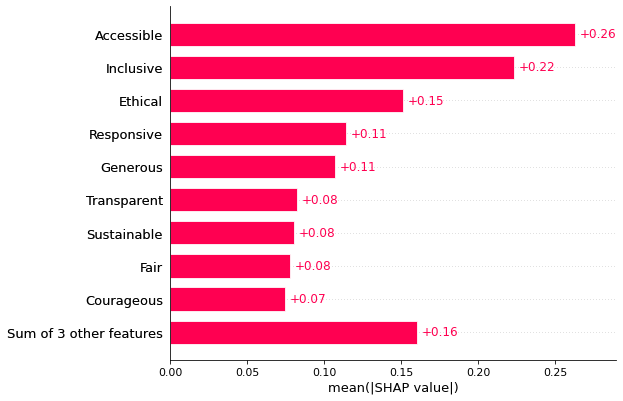

In [8]:
shap.plots.bar(shap_values)

In [9]:
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
shap_importance.head(12)

,col_name,feature_importance_vals
10,Accessible,0.262806
6,Inclusive,0.222952
2,Ethical,0.151349
7,Responsive,0.114470
8,Generous,0.107169
9,Transparent,0.082105
3,Sustainable,0.080295
1,Fair,0.077572
5,Courageous,0.074848
0,Knowledgeable,0.062757


In [10]:
from sklearn.metrics import r2_score,mean_squared_error as MSE
y_pred = model.predict(X)
print("LGBM R2_SCORE:", r2_score(y, model.predict(X)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [11]:
shap_importance.to_csv('cf_vals_Dec23.csv')